In [1]:
# simple notebook to take a text corpus and work out word frequencies

In [1]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [2]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [3]:
# load Englsh dictionary
dictionary_df = tmt.dictionary.get_dictionary_words("words.txt")
# a set is mroe efficient when checking for membership
dictionary_set = set(dictionary_df['words'].values.tolist())

In [4]:
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/hillsborough/txt/", text_filename_pattern="*.txt")

content_directory =  data_sets/hillsborough/txt/
text_filename_pattern =  *.txt
self.documents populated =  19217


In [5]:
a = cr.get_text_by_document('03.txt')
print(a)

RAVIOLI

Put on the bread board about two pounds of flour in a heap; make a
hollow in the middle and put in it a piece of butter, three egg-yolks,
salt and three or four tablespoonfuls of lukewarm water. Make a paste
and knead it well, then let it stand for an hour, wrapped or covered
with a linen cloth. Then spread the paste to a thin sheet, as thin as a
ten-cent piece.

Chop and grind pieces of roast or boiled chicken meat: add to it an
equal part of marrow from the bones of beef and pieces of brains, three
yolks, some crumbs of bread soaked in milk or broth and some grated
cheese (Parmesan or Swiss). Rub through a sieve and make little balls as
big as a hazel-nut, which are to be placed at equal distances (a little
more than an inch) in a line over the sheet of paste.

Beat a whole egg and pass it over the paste with a brush all around the
little balls. Cover these with another sheet of paste, press down the
intervals between each ball, and then separate each section from the
other 

In [5]:
# wordcount to wordcloud
# pipeline

# get all text from corpus
a = cr.get_all_text()

# simplify whitespace (remove newlines)
b = tmt.text_processing.simplify_whitespace(a)

# only keep alphanumeric characters, removes punctuation
c = tmt.text_processing.keep_only_alphanumeric(b)

# make lowercase
d = tmt.text_processing.to_lowercase(c)

# split into words list
dl = tmt.text_processing.split_text_into_words(d)

# remove stop words
el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")

# only keep words with min length 5
fl = tmt.word_processing.keep_words_min_length(el,5)

# keep only words found in the Eglish dictionary
gl = [word for word in fl if word in dictionary_set]

#print(b, '\n')
#print(c, '\n')
#print(dl, '\n')
#print(el, '\n')
#print(fl, '\n')

In [6]:
# word counts
wc = tmt.word_processing.count_word_occurance(gl)
wc[:10]

,count
police,358160
there,251553
ground,243109
which,220052
other,188236
would,180488
should,136455
football,135171
people,134446
number,133143


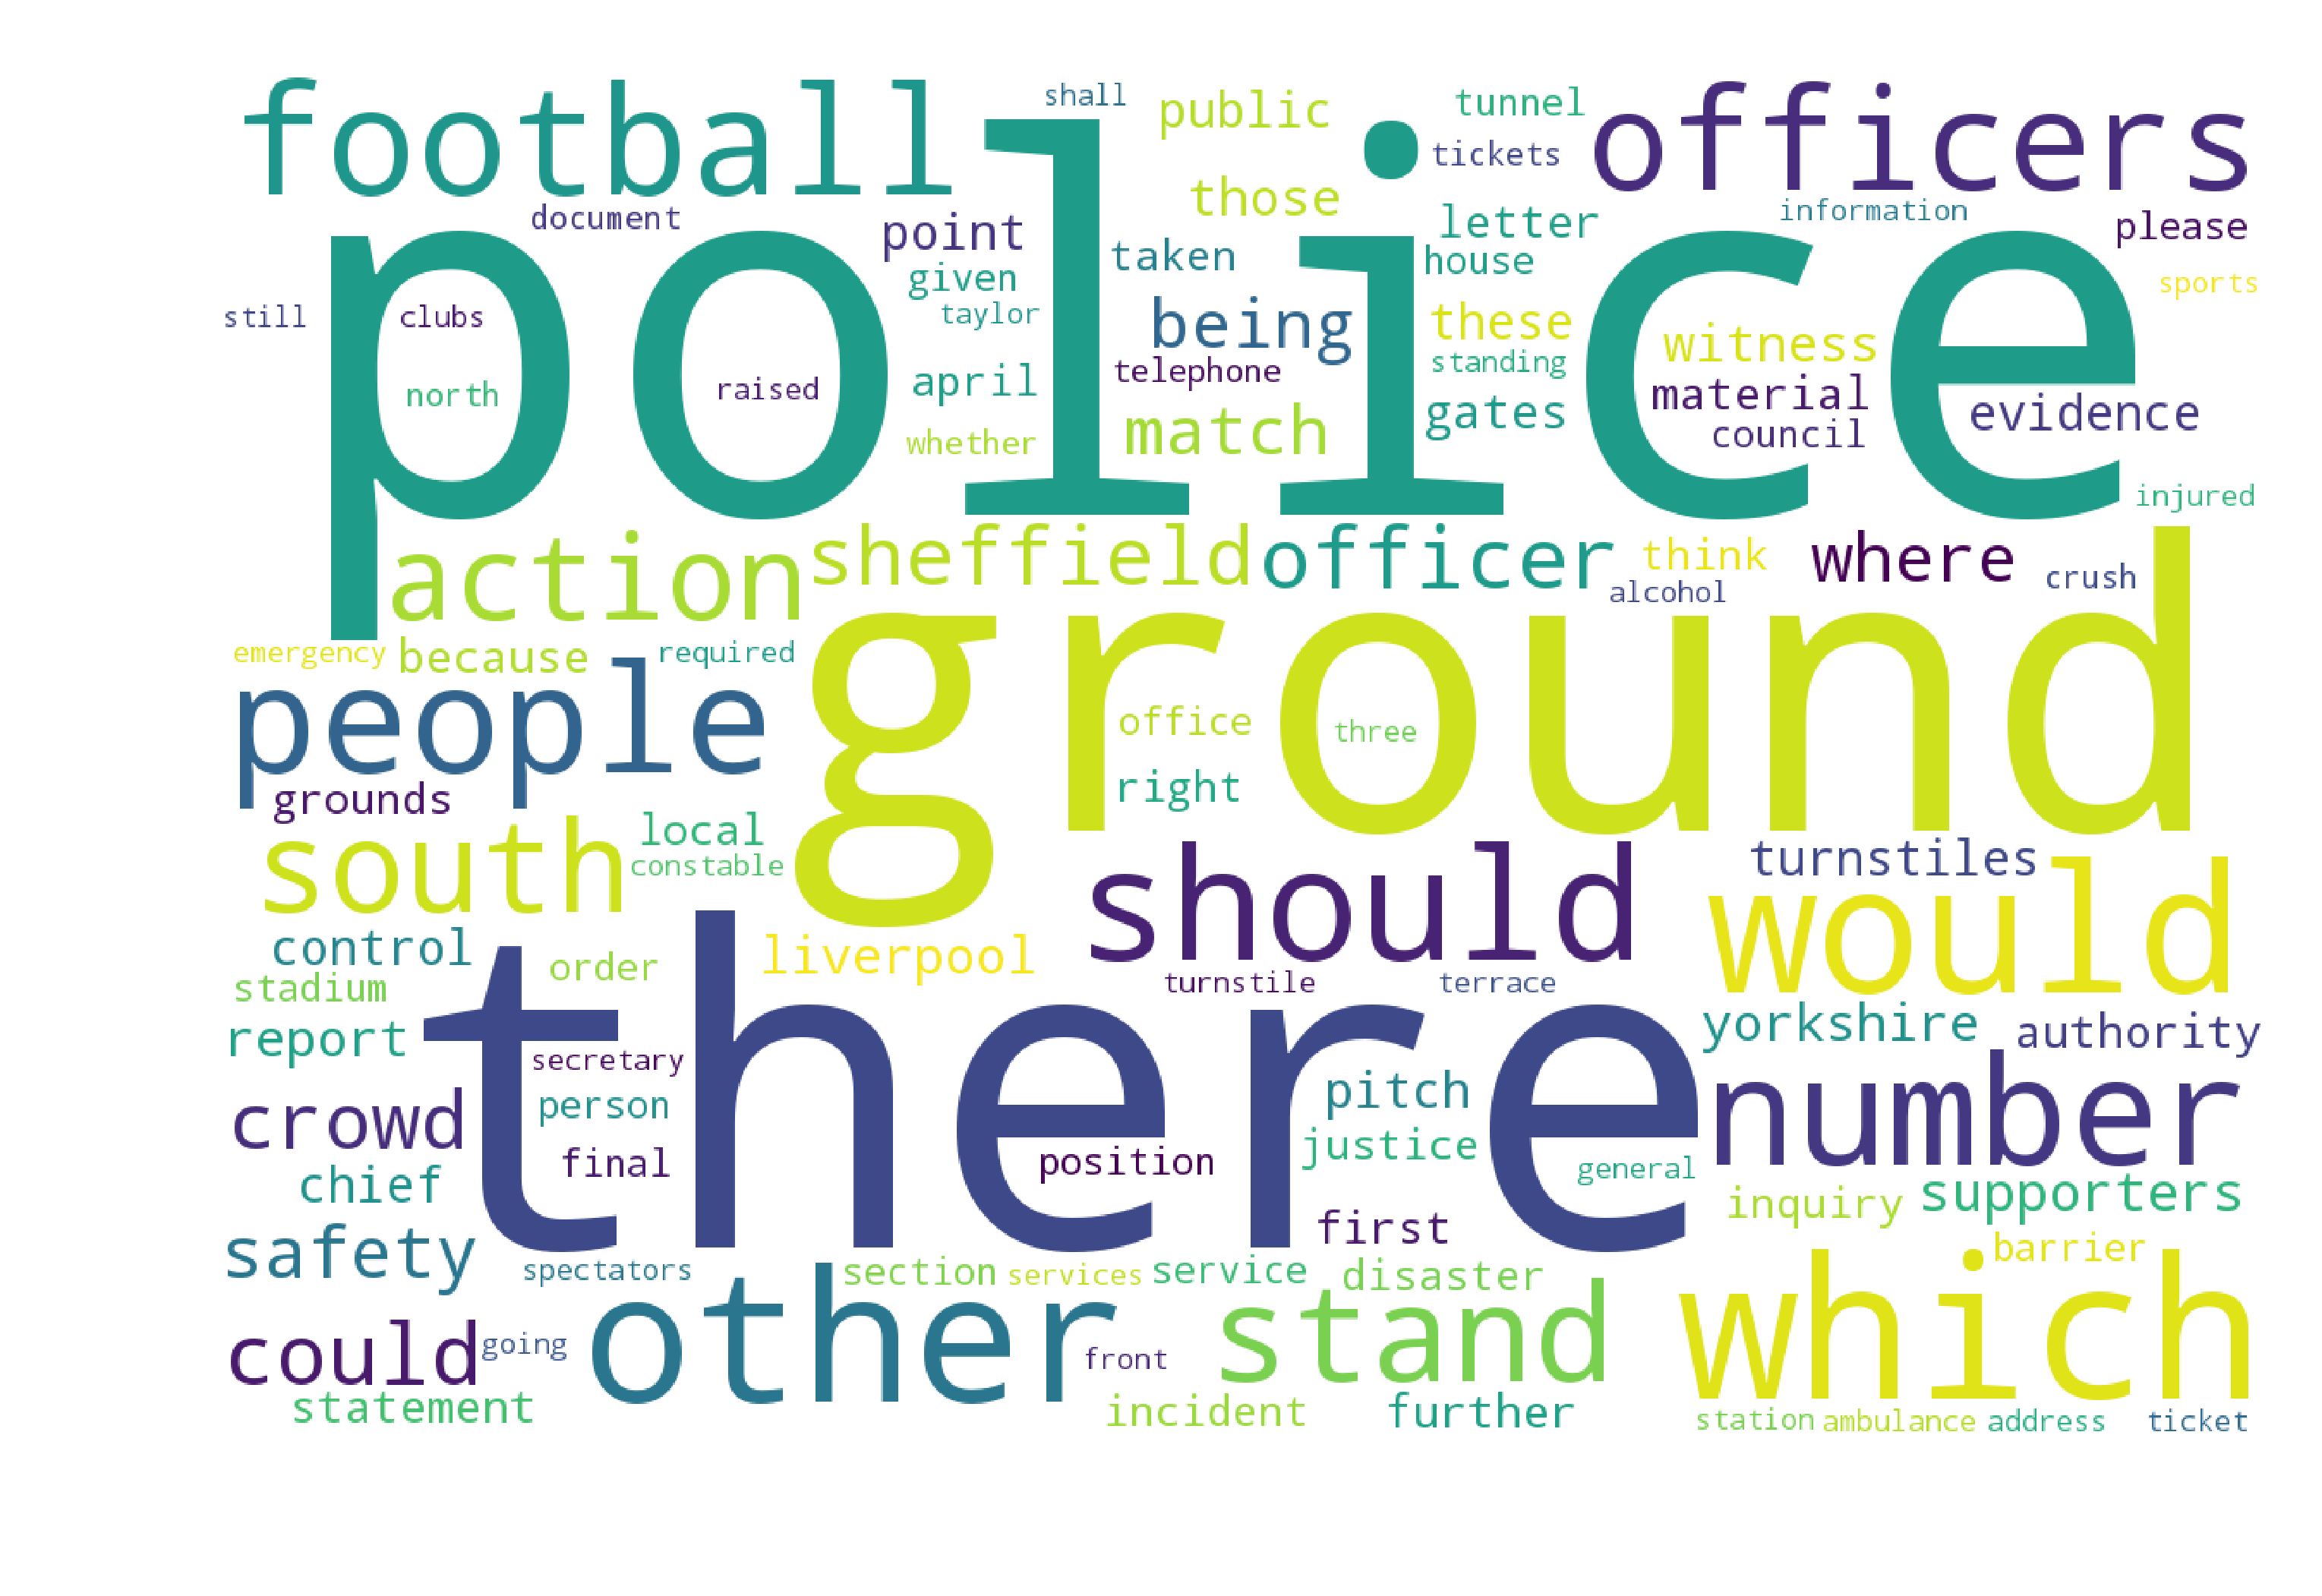

In [7]:
# word cloud
tmt.visualisation.plot_wordcloud(wc[:100])